In [ ]:
!pip install -q "accelerate" "sentencepiece"
!pip install -q "transformers @ git+https://github.com/huggingface/transformers.git"

!pip install torch==2.2.1 torchvision==0.17.1 --quiet
import torch
print("Torch:", torch.__version__)


  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 516.2/516.2 kB 17.4 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sentence-transformers 5.1.2 requires transformers<5.0.0,>=4.41.0, but you have transformers 5.0.0.dev0 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 755.5/755.5 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 20.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 92.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 86.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 46.5 MB/s eta 0:00:00
   ━━━━


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/usr/local/lib/python3.12/dist-packages/colab_kernel_launcher.py", line 37, in <module>
    ColabKernelApp.launch_instance()
  File "/usr/local/lib/python3.12/dist-packages/traitlets/config/application.py", line 992, in launch_instance
    app.start()
  File "/usr/local/lib/python3.12/dist-packages/ipykernel/kernelapp.py", line 712, in start
    self.io_loop.start()
  File "/usr/local/lib/python3.12/dist-package

Torch: 2.2.1+cu121


In [ ]:
!pip install "numpy<2"


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 47.8 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sentence-transformers 5.1.2 requires transformers<5.0.0,>=4.41.0, but you have transformers 5.0.0.dev0 which is incompatible.
jax 0.7.2 requires numpy>=2.0, but you have numpy 1.26.4 which is incompatible.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
opencv-contrib-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
pytensor 2.35.1 requires numpy>=2.0, but you ha

In [ ]:
!pip install SimpleITK

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.6/52.6 MB 20.8 MB/s eta 0:00:00


In [ ]:
# ============================
# FULL RAM + GPU CLEANUP
# ============================

import gc, torch, matplotlib.pyplot as plt

print("Chiudo tutte le figure...")
plt.close('all')

# Cancello oggetti comuni del training
for name in [
    "model", "train_ds", "val_ds",
    "img_batch", "lab_batch", "pred",
    "img_b", "lab_b",
    "img_full_c", "lab_full_c",
    "pred_bin_c", "pred_prob_c",
]:
    if name in globals():
        del globals()[name]

# Cancello TUTTE le variabili grandi automaticamente
big_vars = []
for k, v in list(globals().items()):
    try:
        # tensore, numpy array o lista enorme
        if hasattr(v, "shape") or (isinstance(v, list) and len(v) > 200):
            big_vars.append(k)
            del globals()[k]
    except:
        pass

print("Variabili grandi cancellate:", big_vars)



Chiudo tutte le figure...
Variabili grandi cancellate: []


In [ ]:
import gc, torch, matplotlib.pyplot as plt

# Garbage collector CPU
print("GC collect...")
gc.collect()

# Svuoto cache GPU
if torch.cuda.is_available():
    print("Svuoto VRAM...")
    torch.cuda.empty_cache()
    torch.cuda.ipc_collect()

print("Cleanup completato.")

GC collect...
Svuoto VRAM...
Cleanup completato.



# CONFIG + DATASET ASOCA (sostituisce hcat.config + hcat.logging)



In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:

# =========================
# CONFIG + PATH + SPLIT
# =========================

import os
import random
import numpy as np
from types import SimpleNamespace

# >>> CAMBIA SOLO QUESTO <<< (se serve)
BASE_DIR_ASOCA = "/content/drive/MyDrive/Colab Notebooks/Neuroengineering/Challenge/ASOCA"
BASE_DIR_CAS   = "/content/drive/MyDrive/Colab Notebooks/Neuroengineering/Challenge/ImageCAS/Data"

# struttura attesa ASOCA:
# BASE_DIR_ASOCA/
#   Normal/CTCA/
#   Normal/Annotations/
#   Diseased/CTCA/
#   Diseased/Annotations/

NORMAL_CT_DIR       = os.path.join(BASE_DIR_ASOCA, "Normal",   "CTCA")
NORMAL_LABEL_DIR    = os.path.join(BASE_DIR_ASOCA, "Normal",   "Annotations")
DISEASED_CT_DIR     = os.path.join(BASE_DIR_ASOCA, "Diseased", "CTCA")
DISEASED_LABEL_DIR  = os.path.join(BASE_DIR_ASOCA, "Diseased", "Annotations")

# Cartelle test (solo immagini, senza label)
TEST_NORMAL_CT_DIR   = os.path.join(BASE_DIR_ASOCA, "Normal",   "Testset_Normal")
TEST_DISEASED_CT_DIR = os.path.join(BASE_DIR_ASOCA, "Diseased", "Testset_Diseased")


def _get_case_ids(ct_folder):
    """ID (nome file senza estensione) da una cartella ASOCA (.nii/.nii.gz/.nrrd/.mha)."""
    if not os.path.isdir(ct_folder):
        return []
    ids = []
    for f in os.listdir(ct_folder):
        name = f.lower()
        if not name.endswith((".nii", ".nii.gz", ".nrrd", ".mha")):
            continue
        base = f
        if base.lower().endswith(".gz"):
            base = os.path.splitext(base)[0]
        base = os.path.splitext(base)[0]
        ids.append(base)
    return sorted(ids)


def _get_full_paths(ct_folder):
    """Lista di path completi ai file di test ASOCA."""
    if not os.path.isdir(ct_folder):
        return []
    paths = []
    for f in os.listdir(ct_folder):
        name = f.lower()
        if not name.endswith((".nii", ".nii.gz", ".nrrd", ".mha")):
            continue
        paths.append(os.path.join(ct_folder, f))
    return sorted(paths)


# --------- ImageCAS: lettura ID --------- #

def _get_cas_ids(cas_folder):
    """
    Cerca file tipo:
      1.img.nii.gz
      1.label.nii.gz
    Ritorna ID come stringhe 'CAS_1', 'CAS_2', ...
    """
    if not os.path.isdir(cas_folder):
        return []
    ids = []
    for f in os.listdir(cas_folder):
        name = f.lower()
        if not name.endswith(".img.nii.gz"):
            continue
        # prendo la parte prima di ".img.nii.gz"
        base = f[: -len(".img.nii.gz")]
        ids.append(f"CAS_{base}")
    # se sono numeri, li ordino numericamente
    def _key(x):
        try:
            return int(x.replace("CAS_", ""))
        except ValueError:
            return x
    return sorted(ids, key=_key)


# ---- train/val: prendo gli ID da CTCA + CAS ----
normal_ids   = _get_case_ids(NORMAL_CT_DIR)       # es. 'Normal_1'
diseased_ids = _get_case_ids(DISEASED_CT_DIR)     # es. 'Diseased_3'
cas_ids      = _get_cas_ids(BASE_DIR_CAS)         # es. 'CAS_1'

all_ids = normal_ids + diseased_ids + cas_ids

# split semplice: 70% train, 15% val, 15% test (interna)
random_seed = 0
random.Random(random_seed).shuffle(all_ids)

n = len(all_ids)
train_ratio = 0.7
val_ratio   = 0.15
n_train = int(train_ratio * n)
n_val   = int(val_ratio * n)

train_ids = all_ids[:n_train]
val_ids   = all_ids[n_train:n_train + n_val]

# ---- test ufficiale ASOCA: uso i folder Testset_* ----
test_paths_normal   = _get_full_paths(TEST_NORMAL_CT_DIR)
test_paths_diseased = _get_full_paths(TEST_DISEASED_CT_DIR)
test_ids = test_paths_normal + test_paths_diseased

# Se i folder Testset_* sono vuoti/non esistono, uso il resto come test interno
if len(test_ids) == 0:
    test_ids = all_ids[n_train + n_val :]

# ---- finto "config" ----
config = SimpleNamespace()
config.random = SimpleNamespace(seed=random_seed)

config.dataset = SimpleNamespace()
config.dataset.ASOCA = SimpleNamespace(
    split={
        "train": train_ids,   # es: ["Normal_1", "Diseased_3", "CAS_1", ...]
        "val":   val_ids,
        "test":  test_ids,    # per il test: path completi ai .nrrd (ASOCA) o ID se fallback
    },
    change_image_every_n_samplings=128,
    path_normal_image=NORMAL_CT_DIR,
    path_diseased_image=DISEASED_CT_DIR,
    path_normal_label=NORMAL_LABEL_DIR,
    path_diseased_label=DISEASED_LABEL_DIR,
    path_cas_data=BASE_DIR_CAS,
)

# ---- logging minimo ----
def error(msg: str, return_only: bool = False) -> str:
    text = f"[ERROR] {msg}"
    print(text)
    return text


def debug(msg: str) -> None:
    return  # disattivato


# =========================
# AUGMENTATIONS 2D
# =========================

import torch
from numpy.random import default_rng

try:
    _seed = config.random.seed
except NameError:
    _seed = 0

_rng = default_rng(_seed)


def hflip(img: torch.Tensor, lab: torch.Tensor):
    if _rng.binomial(1, 0.5):
        img = torch.flip(img, dims=[-1])
        lab = torch.flip(lab, dims=[-1])
    return img, lab


def vflip(img: torch.Tensor, lab: torch.Tensor):
    if _rng.binomial(1, 0.5):
        img = torch.flip(img, dims=[-2])
        lab = torch.flip(lab, dims=[-2])
    return img, lab


def rot90(img: torch.Tensor, lab: torch.Tensor):
    if _rng.binomial(1, 0.3):
        k = int(_rng.integers(0, 4))
        if k > 0:
            img = torch.rot90(img, k, dims=(-2, -1))
            lab = torch.rot90(lab, k, dims=(-2, -1))
    return img, lab


def small_shift(img: torch.Tensor, lab: torch.Tensor):
    if _rng.binomial(1, 0.5):
        dx = int(_rng.integers(-10, 10))
        dy = int(_rng.integers(-10, 10))
        img = torch.roll(img, shifts=(dy, dx), dims=(-2, -1))
        lab = torch.roll(lab, shifts=(dy, dx), dims=(-2, -1))
    return img, lab


def light_noise(img: torch.Tensor, lab: torch.Tensor):
    if _rng.binomial(1, 0.5):
        std = 0.01
        noise = torch.normal(
            mean=0.0,
            std=std,
            size=img.shape,
            device=img.device,
        )
        img = img + noise
    return img, lab


def light_intensity_shift(img: torch.Tensor, lab: torch.Tensor):
    if _rng.binomial(1, 0.5):
        shift = float(_rng.normal(0.0, 0.02))
        img = img + shift
    return img, lab


def augment_2d(img: torch.Tensor, lab: torch.Tensor):
    img, lab = hflip(img, lab)
    img, lab = vflip(img, lab)
    img, lab = rot90(img, lab)
    img, lab = small_shift(img, lab)

    img, lab = light_noise(img, lab)
    img, lab = light_intensity_shift(img, lab)

    img = img.clamp(0.0, 1.0)
    return img, lab


# =========================
# PREPROCESSING 3D -> 2D
# =========================

import torch.nn.functional as F
from skimage.measure import label as sk_label, regionprops


def find_heart_bbox_2d(img_t_norm: torch.Tensor,
                       thresh: float = 0.3,
                       min_area: int = 4000,
                       margin: int = 32):
    S, C, H, W = img_t_norm.shape
    assert C == 1

    mid = S // 2
    sl = img_t_norm[mid, 0].cpu().numpy()

    mask = sl > thresh
    lab = sk_label(mask)

    if lab.max() == 0:
        return 0, H, 0, W

    regions = regionprops(lab)
    reg = max(regions, key=lambda r: r.area)
    if reg.area < min_area:
        return 0, H, 0, W

    minr, minc, maxr, maxc = reg.bbox

    minr = max(minr - margin, 0)
    minc = max(minc - margin, 0)
    maxr = min(maxr + margin, H)
    maxc = min(maxc + margin, W)

    h = maxr - minr
    w = maxc - minc
    side = max(h, w)

    cy = (minr + maxr) / 2.0
    cx = (minc + maxc) / 2.0

    y0 = int(round(cy - side / 2.0))
    x0 = int(round(cx - side / 2.0))

    y0 = max(0, min(H - side, y0))
    x0 = max(0, min(W - side, x0))
    y1 = y0 + side
    x1 = x0 + side

    return y0, y1, x0, x1


def crop_and_resize_volume(img_t: torch.Tensor,
                           lab_t: torch.Tensor | None,
                           bbox,
                           out_side: int = 256):
    y0, y1, x0, x1 = bbox

    img_crop = img_t[:, :, y0:y1, x0:x1]
    lab_crop = None
    if lab_t is not None:
        lab_crop = lab_t[:, :, y0:y1, x0:x1]

    if img_crop.shape[-1] != out_side:
        img_crop = F.interpolate(
            img_crop.float(),
            size=(out_side, out_side),
            mode="bilinear",
            align_corners=False,
        ).half()

        if lab_crop is not None:
            lab_crop = F.interpolate(
                lab_crop.float(),
                size=(out_side, out_side),
                mode="nearest",
            ).long()

    return img_crop, lab_crop


# =========================
# DATASET 2D (ASOCA + ImageCAS)
# =========================

from typing import Literal, Tuple
import SimpleITK as sitk


class DatasetMerged_2d(torch.utils.data.Dataset):
    def __init__(
        self,
        split: Literal['train', 'val', 'test'],
        img_side: int = 512,
        use_cache: bool = True,
        max_cache_size: int = 8,
    ):
        super().__init__()
        self.img_side = img_side
        self.split = split
        self.rng = np.random.default_rng(seed=config.random.seed)

        self.data_ids_pool: list[str] = config.dataset.ASOCA.split[self.split]

        self.use_cache = use_cache
        self.max_cache_size = max_cache_size
        self._cache: dict[str, tuple[torch.Tensor, torch.Tensor | None]] = {}
        self._cache_order: list[str] = []

        match self.split:
            case "train":
                self.change_after_n_sampling = config.dataset.ASOCA.change_image_every_n_samplings
                self.counter = 0
                self.current_patient_id = self.rng.choice(self.data_ids_pool)
                self.image, self.label = self._load_image_label(self.current_patient_id)
            case "val":
                self.current_patient_id = self.data_ids_pool[0]
            case "test":
                self.current_patient_id = self.data_ids_pool[0]
            case _:
                raise ValueError(error(f"'split' must be in ['train', 'val', 'test'], got {self.split}", True))

    # --------- CACHE UTILS --------- #

    def _cache_get(self, patient_id: str):
        if not self.use_cache:
            return None
        return self._cache.get(patient_id, None)

    def _cache_put(self, patient_id: str, img_t: torch.Tensor, lab_t: torch.Tensor | None):
        if not self.use_cache:
            return
        if patient_id in self._cache:
            return
        if len(self._cache_order) >= self.max_cache_size:
            old_id = self._cache_order.pop(0)
            self._cache.pop(old_id, None)
        self._cache[patient_id] = (img_t, lab_t)
        self._cache_order.append(patient_id)

    # --------- LOADING --------- #

    def _load_image_label(self, patient_id: str):
        """
        - train / val:
            * ASOCA: 'Normal_xxx' o 'Diseased_xxx'
            * ImageCAS: 'CAS_1', 'CAS_2', ...
        - test:
            * path completo (ASOCA testset) oppure ID (fallback)

        Ritorna (img_t, lab_t) su CPU.
        """

        cached = self._cache_get(patient_id)
        if cached is not None:
            img_t, lab_t = cached
            return img_t, lab_t

        if self.split == "test" and os.path.sep in patient_id:
            # caso test ASOCA ufficiale: patient_id è un path
            img_path = patient_id
            lab_path = None

        elif self.split in ["train", "val", "test"]:
            # CAS?
            if patient_id.startswith("CAS_"):
                base_id = patient_id.replace("CAS_", "")
                cas_dir = config.dataset.ASOCA.path_cas_data
                img_path = os.path.join(cas_dir, f"{base_id}.img.nii.gz")
                lab_path = os.path.join(cas_dir, f"{base_id}.label.nii.gz")
            else:
                # ASOCA normale/diseased (.nrrd)
                is_normal = ("Normal" in patient_id) or ("normal" in patient_id)

                img_dir = (
                    config.dataset.ASOCA.path_normal_image
                    if is_normal
                    else config.dataset.ASOCA.path_diseased_image
                )
                lab_dir = (
                    config.dataset.ASOCA.path_normal_label
                    if is_normal
                    else config.dataset.ASOCA.path_diseased_label
                )

                img_path = os.path.join(img_dir, patient_id + ".nrrd")
                lab_path = os.path.join(lab_dir, patient_id + ".nrrd")
        else:
            raise ValueError(error(f"Split sconosciuto: {self.split}", True))

        # 3) controlli
        if not os.path.isfile(img_path):
            raise FileNotFoundError(error(f"Immagine non trovata: {img_path}", True))
        if self.split in ["train", "val"] and (lab_path is None or not os.path.isfile(lab_path)):
            raise FileNotFoundError(error(f"Label non trovata per {patient_id}: {lab_path}", True))

        debug(f"Carico immagine da: {img_path}")
        if lab_path is not None:
            debug(f"Carico label da:    {lab_path}")

        # 4) lettura immagine
        sitk_img = sitk.ReadImage(img_path)
        img_np = sitk.GetArrayFromImage(sitk_img).astype(np.float32)

        # NORMALIZZAZIONE UNICA: finestra cardiaca in HU -> [0,1]
        img_np = np.clip(img_np, -200.0, 800.0)
        img_np = (img_np + 200.0) / 1000.0
        img_np = np.clip(img_np, 0.0, 1.0)

        img_np = img_np.astype(np.float16)
        img_t = torch.from_numpy(img_np).unsqueeze(1)  # (S,1,H,W)

        # label
        if lab_path is not None and os.path.isfile(lab_path):
            sitk_lab = sitk.ReadImage(lab_path)
            lab_np = sitk.GetArrayFromImage(sitk_lab).astype(np.int64)
            lab_t = torch.from_numpy(lab_np).unsqueeze(1)  # (S,1,H,W)
        else:
            lab_t = None

        self._cache_put(patient_id, img_t, lab_t)
        return img_t, lab_t

    # --------- PATCH SAMPLING 2D --------- #

    def get(self, minibatch_size: int = 4, out_side: int = 256):
        imgs = []
        labs = []

        for _ in range(minibatch_size):
            pid = self.rng.choice(self.data_ids_pool)

            img_t, lab_t = self._load_image_label(pid)   # (S,1,H,W)

            bbox = find_heart_bbox_2d(img_t, thresh=0.3, min_area=4000, margin=32)
            img_t_crop, lab_t_crop = crop_and_resize_volume(img_t, lab_t, bbox, out_side=out_side)

            lab_np = lab_t_crop[:, 0].cpu().numpy()
            slice_sums = lab_np.sum(axis=(1, 2))
            pos_slices = np.where(slice_sums > 0)[0]

            if len(pos_slices) > 0 and np.random.rand() < 0.7:
                s = int(np.random.choice(pos_slices))
            else:
                s = int(np.random.randint(0, img_t_crop.shape[0]))

            img_s = img_t_crop[s]
            lab_s = lab_t_crop[s]

            img_s, lab_s = augment_2d(img_s, lab_s)

            imgs.append(img_s)
            labs.append(lab_s)

        img_batch = torch.stack(imgs, dim=0).float()
        lab_batch = torch.stack(labs, dim=0).long()

        return img_batch, lab_batch

    # --------- vecchie API per val/test --------- #

    def _get_train(self, minibatch_size: int = 1):
        img_minibatch = torch.zeros((minibatch_size, 1, self.img_side, self.img_side), dtype=torch.float32)
        lab_minibatch = torch.zeros((minibatch_size, 1, self.img_side, self.img_side), dtype=torch.long)
        for b in range(minibatch_size):
            slice_ = self.rng.integers(low=0, high=self.image.shape[0])
            low_k1 = self.rng.integers(low=0, high=self.image.shape[2]-self.img_side+1)
            low_k2 = self.rng.integers(low=0, high=self.image.shape[3]-self.img_side+1)
            img_ = self.image[slice_:slice_+1, :, low_k1:low_k1+self.img_side, low_k2:low_k2+self.img_side]
            lab_ = self.label[slice_:slice_+1, :, low_k1:low_k1+self.img_side, low_k2:low_k2+self.img_side]
            img_, lab_ = augment_2d(img_, lab_)
            img_minibatch[b] = img_
            lab_minibatch[b] = lab_

        self.counter += minibatch_size
        if self.counter >= self.change_after_n_sampling:
            self.counter = 0
            self.current_patient_id = self.rng.choice(self.data_ids_pool)
            self.image, self.label = self._load_image_label(self.current_patient_id)

        return img_minibatch, lab_minibatch

    def _get_val(self):
        return self._get_val_test()

    def _get_test(self):
        return self._get_val_test()

    def _get_val_test(self) -> dict:
        image, label = self._load_image_label(self.current_patient_id)
        out_id = self.current_patient_id
        if self.split == 'test' and os.path.sep in out_id:
            out_id = os.path.splitext(os.path.basename(out_id))[0]
        position = self.data_ids_pool.index(self.current_patient_id)
        if position == -1:
            debug("In DatasetMerged_2d._get_val_test(), position is -1, something is wrong.")
        next_position = (position + 1) % len(self)
        self.current_patient_id = self.data_ids_pool[next_position]
        return {
            "id": f"{self.split}-MERGED-{out_id}",
            "image": image,
            "label": label
        }

    def __len__(self):
        return len(self.data_ids_pool)


N. pazienti train: 168
N. pazienti val:   36
Batch shape: torch.Size([4, 1, 256, 256]) torch.Size([4, 1, 256, 256])


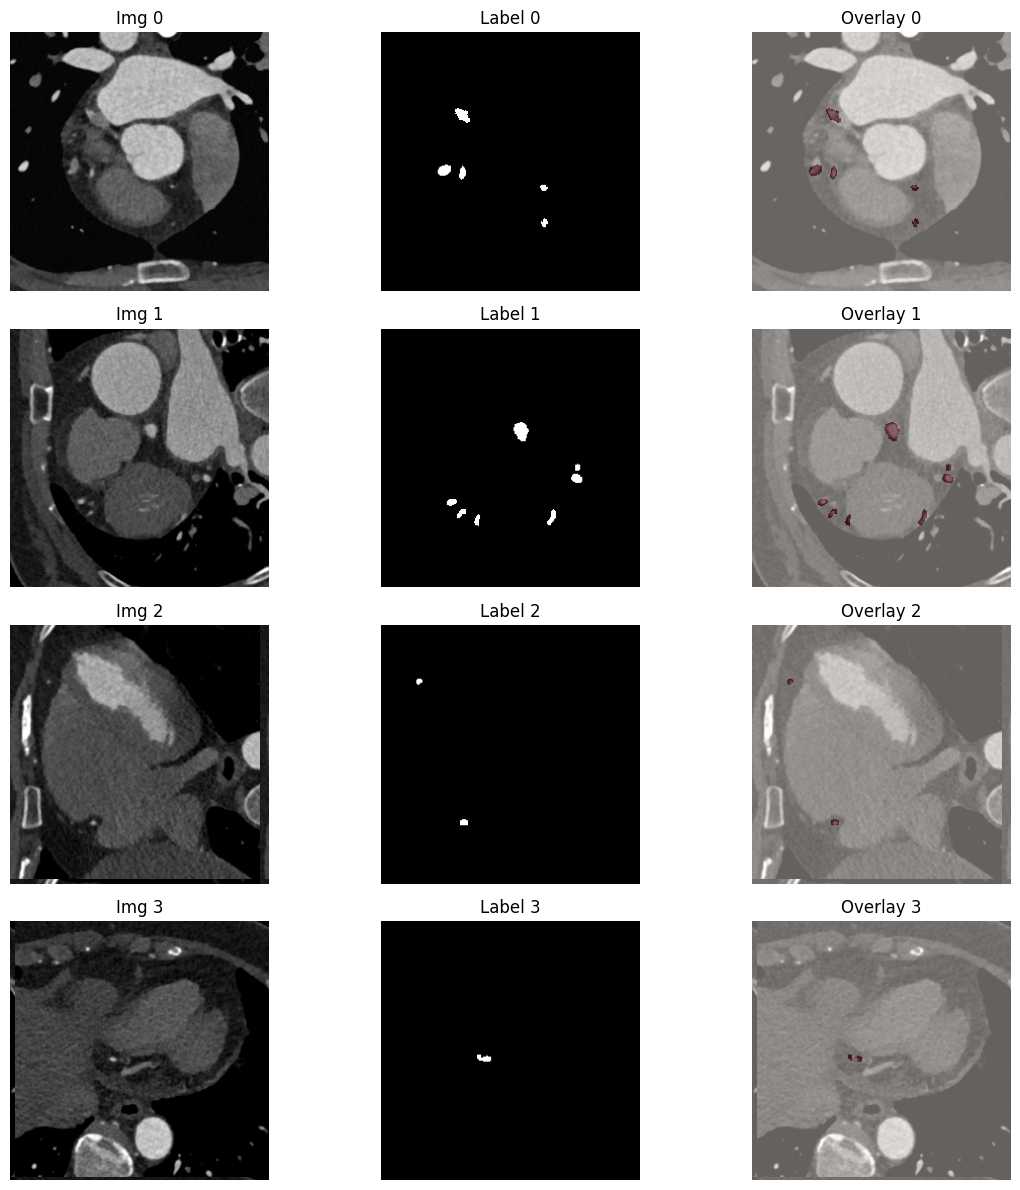

In [ ]:

import matplotlib.pyplot as plt

train_ds = DatasetMerged_2d(split='train', img_side=512)
val_ds   = DatasetMerged_2d(split='val',   img_side=512)

print("N. pazienti train:", len(train_ds))
print("N. pazienti val:  ", len(val_ds))

# ricreo dataset per patch 256x256
train_ds = DatasetMerged_2d(split="train", img_side=256)

# minibatch di 4 patch 256x256
img_b, lab_b = train_ds.get(minibatch_size=4, out_side=256)
print("Batch shape:", img_b.shape, lab_b.shape)

B = img_b.shape[0]
plt.figure(figsize=(12, 3 * B))

for i in range(B):
    img = img_b[i, 0].cpu().numpy()
    lab = lab_b[i, 0].cpu().numpy()

    plt.subplot(B, 3, 3*i + 1)
    plt.imshow(img, cmap="gray")
    plt.title(f"Img {i}")
    plt.axis("off")

    plt.subplot(B, 3, 3*i + 2)
    plt.imshow(lab, cmap="gray")
    plt.title(f"Label {i}")
    plt.axis("off")

    plt.subplot(B, 3, 3*i + 3)
    plt.imshow(img, cmap="gray")
    plt.imshow(lab, alpha=0.4, cmap="Reds")
    plt.title(f"Overlay {i}")
    plt.axis("off")

plt.tight_layout()
plt.show()





In [ ]:
import os

ROOT = "/content/drive/MyDrive/Colab Notebooks/Neuroengineering/Challenge/ImageCAS"
print(os.listdir(ROOT))


['Data']


# EDA

In [ ]:
print("N. Normal:", len(normal_ids))
print("N. Diseased:", len(diseased_ids))
print("Totale:", len(all_ids))

print("\nSplit:")
print("Train:", len(train_ids))
print("Val:  ", len(val_ids))
print("Test:", len(test_ids))


In [ ]:
import numpy as np

def compute_intensity_stats_for_patient(patient_id: str):
    # riuso la logica del tuo Dataset
    tmp_ds = DatasetMerged_2d(split='train', img_side=512)
    img_t, lab_t = tmp_ds._load_image_label(patient_id)  # (slices, 1, H, W)
    img_np = img_t.numpy().reshape(-1)  # flatten

    stats = {
        "patient_id": patient_id,
        "min": float(np.min(img_np)),
        "max": float(np.max(img_np)),
        "p1":  float(np.percentile(img_np, 1)),
        "p5":  float(np.percentile(img_np, 5)),
        "p50": float(np.percentile(img_np, 50)),
        "p95": float(np.percentile(img_np, 95)),
        "p99": float(np.percentile(img_np, 99)),
        "mean": float(np.mean(img_np)),
        "std":  float(np.std(img_np)),
    }
    return stats

N_SAMPLES = 5  # quanti pazienti controllare
sample_ids = random.sample(train_ids, k=min(N_SAMPLES, len(train_ids)))

all_stats = []
for pid in sample_ids:
    stats = compute_intensity_stats_for_patient(pid)
    all_stats.append(stats)
    print("\n=== ", pid, "===")
    for k, v in stats.items():
        if k == "patient_id":
            continue
        print(f"{k:>4}: {v:.2f}")


In [ ]:
def compute_artery_fraction_for_patient(patient_id: str):
    tmp_ds = DatasetMerged_2d(split='train', img_side=512)
    img_t, lab_t = tmp_ds._load_image_label(patient_id)  # (slices, 1, H, W)
    lab_np = lab_t.numpy()  # (S, 1, H, W)

    vessel_mask = (lab_np > 0).astype(np.uint8)
    total_voxels = vessel_mask.size
    vessel_voxels = vessel_mask.sum()

    frac = vessel_voxels / total_voxels

    # anche per-slice (opzionale)
    per_slice_frac = vessel_mask.reshape(lab_np.shape[0], -1).mean(axis=1)

    return frac, per_slice_frac

import matplotlib.pyplot as plt

global_fracs = []
all_slice_fracs = []

for pid in sample_ids:
    frac, per_slice_frac = compute_artery_fraction_for_patient(pid)
    global_fracs.append(frac)
    all_slice_fracs.extend(per_slice_frac.tolist())
    print(f"{pid}: fraction vessel voxels = {frac:.6f}")

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.hist(global_fracs, bins=10)
plt.title("Fraction vessel voxels per volume")
plt.xlabel("fraction")
plt.ylabel("count")

plt.subplot(1,2,2)
plt.hist(all_slice_fracs, bins=30)
plt.title("Fraction vessel voxels per slice")
plt.xlabel("fraction")
plt.ylabel("count")

plt.tight_layout()
plt.show()


In [ ]:
def reorient_volume_for_heart(v):
    # v: (S, H, W) o (H, W, S) dopo downsample
    # prima portiamo a (H, W, S)
    v = np.transpose(v, (1, 2, 0))

    # ora ruoto il cuore di 90° intorno all'asse verticale
    # serve per “raddrizzare” la vista laterale
    v = np.rot90(v, k=1, axes=(1, 2))  # rotazione H-W

    # se ancora non è frontale, flippa l'asse verticale
    # v = np.flip(v, axis=0)

    return v


In [ ]:
import plotly.graph_objects as go
import numpy as np

def plot_coronary_3d(patient_id_3d, title_prefix=""):
    print(f"--> Plot 3D per paziente: {patient_id_3d}")

    tmp_ds = DatasetMerged_2d(split='train', img_side=512)
    img_t, lab_t = tmp_ds._load_image_label(patient_id_3d)

    lab_np = lab_t.numpy()[:, 0, :, :]  # (S, H, W)
    vessel = (lab_np > 0).astype(np.uint8)

    print("Original volume:", vessel.shape, "voxels:", vessel.sum())

    # downsample
    vessel_ds = vessel[::2, ::2, ::2]

    # --- ORIENTAMENTO CORRETTO ---
    v = reorient_volume_for_heart(vessel_ds)

    print("Oriented volume:", v.shape)

    # coordinate
    Z, Y, X = np.indices(v.shape)

    fig = go.Figure(data=go.Isosurface(
        x=X.flatten(),
        y=Y.flatten(),
        z=Z.flatten(),
        value=v.flatten().astype(np.float32),
        isomin=0.5,
        isomax=1.0,
        surface_count=1,
        caps=dict(x_show=False, y_show=False, z_show=False)
    ))

    fig.update_layout(
        title=f"{title_prefix} – {patient_id_3d}",
        scene=dict(
            xaxis_title='X (left-right)',
            yaxis_title='Y (up-down)',
            zaxis_title='Depth'
        ),
        width=700,
        height=700
    )

    fig.show()

# scegli un paziente sano e uno malato
patient_id_normal = normal_ids[0]     # puoi cambiare indice
patient_id_diseased = diseased_ids[0] # idem

print("Normal example:", patient_id_normal)
print("Diseased example:", patient_id_diseased)


In [ ]:
plot_coronary_3d(patient_id_normal, title_prefix="Normal")


In [ ]:
plot_coronary_3d(patient_id_diseased, title_prefix="Diseased")


# U-NET Baseline

In [ ]:
def get_balanced_batch(
    dataset,
    minibatch_size: int = 4,
    pos_ratio: float = 0.7,
    foreground_threshold: int = 5,
    out_side: int = 256,
    oversample_factor: int = 4,  # quante patch genero in totale = minibatch_size * oversample_factor
) -> tuple[torch.Tensor, torch.Tensor]:
    """
    Estrae un batch ~bilanciato:
    - cerca di avere ~pos_ratio patch con almeno `foreground_threshold` pixel di vaso
    - niente while infinito: genera un numero fisso di patch e sceglie da lì
    """
    n_pos_desired = int(round(minibatch_size * pos_ratio))
    n_neg_desired = minibatch_size - n_pos_desired

    imgs_all, labs_all = [], []
    is_pos_all = []

    # 1) genero un blocco di patch
    num_samples = minibatch_size * oversample_factor
    for _ in range(num_samples):
        img_1, lab_1 = dataset.get(minibatch_size=1, out_side=out_side)  # (1,1,H,W)
        img_1 = img_1[0]   # (1,H,W)
        lab_1 = lab_1[0]   # (1,H,W)

        num_fg = (lab_1 > 0).sum().item()
        is_pos = num_fg >= foreground_threshold

        imgs_all.append(img_1)
        labs_all.append(lab_1)
        is_pos_all.append(is_pos)

    # 2) indici di positive e negative in questo blocco
    pos_indices = [i for i, f in enumerate(is_pos_all) if f]
    neg_indices = [i for i, f in enumerate(is_pos_all) if not f]

    # 3) prendo quante più pos/neg posso
    import random

    random.shuffle(pos_indices)
    random.shuffle(neg_indices)

    n_pos = min(n_pos_desired, len(pos_indices))
    n_neg = min(n_neg_desired, len(neg_indices))

    chosen_indices = pos_indices[:n_pos] + neg_indices[:n_neg]

    # se non raggiungo minibatch_size, riempio con altri indici qualsiasi
    all_indices = list(range(len(imgs_all)))
    random.shuffle(all_indices)

    for i in all_indices:
        if len(chosen_indices) >= minibatch_size:
            break
        if i not in chosen_indices:
            chosen_indices.append(i)

    # nel caso limite in cui num_samples < minibatch_size (non dovrebbe succedere),
    # faccio un assert per sicurezza
    assert len(chosen_indices) >= minibatch_size, "Non ho abbastanza patch per il batch"

    # tengo solo i primi minibatch_size
    chosen_indices = chosen_indices[:minibatch_size]

    imgs = [imgs_all[i] for i in chosen_indices]
    labs = [labs_all[i] for i in chosen_indices]

    img_batch = torch.stack(imgs, dim=0)  # (B,1,H,W)
    lab_batch = torch.stack(labs, dim=0)  # (B,1,H,W)

    # shuffle nel batch
    perm = torch.randperm(minibatch_size)
    img_batch = img_batch[perm]
    lab_batch = lab_batch[perm]

    return img_batch, lab_batch

In [ ]:
# =========================
# UNET 2D SMALL
# =========================

import torch
import torch.nn as nn
import torch.nn.functional as F

class UNet2D_small(nn.Module):
    def __init__(self, in_ch=1, out_ch=1):
        super().__init__()

        def cb(i,o):
            return nn.Sequential(
                nn.Conv2d(i,o,3,padding=1), nn.ReLU(inplace=True),
                nn.Conv2d(o,o,3,padding=1), nn.ReLU(inplace=True),
            )

        self.e1 = cb(in_ch, 32)
        self.e2 = cb(32, 64)
        self.e3 = cb(64, 128)
        self.e4 = cb(128, 256)

        self.b  = cb(256, 512)

        self.u4 = nn.ConvTranspose2d(512, 256, 2, stride=2)
        self.d4 = cb(256 + 256, 256)

        self.u3 = nn.ConvTranspose2d(256, 128, 2, stride=2)
        self.d3 = cb(128 + 128, 128)

        self.u2 = nn.ConvTranspose2d(128, 64, 2, stride=2)
        self.d2 = cb(64 + 64, 64)

        self.u1 = nn.ConvTranspose2d(64, 32, 2, stride=2)
        self.d1 = cb(32 + 32, 32)

        self.out = nn.Conv2d(32, out_ch, 1)

    def forward(self,x):
        e1 = self.e1(x)
        e2 = self.e2(F.max_pool2d(e1,2))
        e3 = self.e3(F.max_pool2d(e2,2))
        e4 = self.e4(F.max_pool2d(e3,2))

        b  = self.b(F.max_pool2d(e4,2))

        d4 = self.u4(b)
        d4 = torch.cat([d4, e4], dim=1)
        d4 = self.d4(d4)

        d3 = self.u3(d4)
        d3 = torch.cat([d3, e3], dim=1)
        d3 = self.d3(d3)

        d2 = self.u2(d3)
        d2 = torch.cat([d2, e2], dim=1)
        d2 = self.d2(d2)

        d1 = self.u1(d2)
        d1 = torch.cat([d1, e1], dim=1)
        d1 = self.d1(d1)

        return self.out(d1)


In [ ]:
# =========================
# LOSS (BCE + DICE) & METRIC
# =========================

import torch
import torch.nn as nn

bce_loss = nn.BCEWithLogitsLoss()

def dice_loss(pred_logits: torch.Tensor,
              target: torch.Tensor,
              eps: float = 1e-6) -> torch.Tensor:
    pred_prob = torch.sigmoid(pred_logits)
    target = target.float()

    pred_flat = pred_prob.view(pred_prob.size(0), -1)
    targ_flat = target.view(target.size(0), -1)

    inter = (pred_flat * targ_flat).sum(dim=1)
    union = pred_flat.sum(dim=1) + targ_flat.sum(dim=1) + eps

    dice = (2 * inter + eps) / union
    return 1.0 - dice.mean()

def combined_loss(pred_logits: torch.Tensor,
                  target: torch.Tensor,
                  alpha: float = 0.5) -> torch.Tensor:
    """
    loss = alpha * BCE + (1-alpha) * Dice
    """
    target = target.float()
    loss_bce = bce_loss(pred_logits, target)
    loss_dice = dice_loss(pred_logits, target)
    return alpha * loss_bce + (1.0 - alpha) * loss_dice

def dice_score(pred_logits: torch.Tensor,
               target: torch.Tensor,
               eps: float = 1e-6) -> float:
    pred_prob = torch.sigmoid(pred_logits)
    target = target.float()

    pred_bin = (pred_prob > 0.5).float()

    inter = (pred_bin * target).sum(dim=(1,2,3))
    union = pred_bin.sum(dim=(1,2,3)) + target.sum(dim=(1,2,3)) + eps

    dice = (2 * inter + eps) / union
    return dice.mean().item()


In [ ]:
# =========================
# TRAINING U-NET BASELINE
# =========================

import torch
from segmentation import WeightedCrossEntropyLoss, DiceLoss, IoULoss

device = "cuda" if torch.cuda.is_available() else "cpu"
print("Device:", device)

IMG_SIDE = 256

# dataset (usa già preprocessing + crop cuore + augment)
train_ds = DatasetMerged_2d(split="train", img_side=IMG_SIDE)

model = UNet2D_small(in_ch=1, out_ch=1).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

batch_size = 2
steps_per_epoch = 100   # alza se vuoi più passi
num_epochs = 30

# ====== LOSS + METRICHE DAL TUO segmentation.py =========

# CE con pesi dinamici (foreground / background)
ce_loss_fn = WeightedCrossEntropyLoss(
    target=None,
    label_smoothing=0.0,
)

# Dice come loss
dice_loss_fn = DiceLoss(
    smooth=1,
    class_reduction="foreground mean",
    batch_reduction="mean",
    which="loss",          # qui usata come loss
)

# Dice come metrica (score)
dice_score_fn = DiceLoss(
    smooth=1,
    class_reduction="foreground mean",
    batch_reduction="mean",
    which="score",         # qui usata come score
)

# IoU come metrica (score)
iou_metric_fn = IoULoss(
    smooth=1,
    class_reduction="foreground mean",
    batch_reduction="mean",
    which="score",
)

def build_two_class_logits(logits_fg: torch.Tensor) -> torch.Tensor:
    """
    UNet esce con [B,1,H,W] (foreground).
    Qui creiamo [B,2,H,W] = [bg, fg] per usare le tue loss multi-classe.
    """
    zero_bg = torch.zeros_like(logits_fg)
    logits_2 = torch.cat([zero_bg, logits_fg], dim=1)  # [B,2,H,W]
    return logits_2

# ====== STORICO PER PLOT =======================
loss_history = []
dice_history = []
iou_history  = []

# =========================
# LOOP TRAINING
# =========================

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    running_dice = 0.0
    running_iou  = 0.0

    for step in range(steps_per_epoch):
        img_batch, lab_batch = get_balanced_batch(
            train_ds,
            minibatch_size=batch_size,
            pos_ratio=0.7,
            foreground_threshold=5,
            out_side=IMG_SIDE,
        )

        img_batch = img_batch.to(device).float()   # [B,1,H,W]
        lab_batch = lab_batch.to(device)           # [B,1,H,W], int con label anatomiche

        # binarizzo: vessel = label > 0
        target_bin = (lab_batch > 0).long()        # [B,1,H,W] con {0,1}

        pred_logits = model(img_batch)             # [B,1,H,W]

        # costruisco logits a 2 classi [B,2,H,W]
        logits_2 = build_two_class_logits(pred_logits)

        # aggiorna pesi CE sul batch
        ce_loss_fn.update_weight(target_bin)

        # CE + Dice (dal tuo file)
        ce_loss   = ce_loss_fn(logits_2, target_bin)
        d_loss    = dice_loss_fn(logits_2, target_bin, x_is_probabilities=False)
        loss      = 0.5 * ce_loss + 0.5 * d_loss

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # metriche (Dice / IoU) come score
        with torch.no_grad():
            dice_val = dice_score_fn(
                logits_2,
                target_bin,
                x_is_probabilities=False
            )
            iou_val = iou_metric_fn(
                logits_2,
                target_bin,
                x_is_probabilities=False
            )

        running_loss += loss.item()
        running_dice += dice_val.item()
        running_iou  += iou_val.item()

        if (step + 1) % 5 == 0:
            print(
                f"  step {step+1}/{steps_per_epoch}  "
                f"loss={loss.item():.4f}  "
                f"ce={ce_loss.item():.4f}  "
                f"dice_loss={d_loss.item():.4f}  "
                f"dice={dice_val.item():.4f}  "
                f"IoU={iou_val.item():.4f}"
            )

    avg_loss = running_loss / steps_per_epoch
    avg_dice = running_dice / steps_per_epoch
    avg_iou  = running_iou  / steps_per_epoch

    loss_history.append(avg_loss)
    dice_history.append(avg_dice)
    iou_history.append(avg_iou)

    print(
        f"Epoch {epoch+1}/{num_epochs} | "
        f"loss={avg_loss:.4f} | "
        f"dice={avg_dice:.4f} | "
        f"IoU={avg_iou:.4f}"
    )

In [ ]:
# =========================
# PLOT TRAINING CURVES
# =========================

import matplotlib.pyplot as plt

epochs = range(1, len(loss_history)+1)

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(epochs, loss_history, "-o")
plt.title("Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(epochs, dice_history, "-o")
plt.title("Training Dice Score")
plt.xlabel("Epoch")
plt.ylabel("Dice")
plt.grid(True)

plt.tight_layout()
plt.show()


## Predict real volumes

In [ ]:
# =========================
# PREDIZIONE SU VOLUME (CROPPATO)
# =========================

import matplotlib.pyplot as plt
import torch

def predict_full_volume_cropped(model, dataset, patient_id, out_side=256, device="cuda"):
    """
    - carica volume intero (img_t, lab_t)
    - fa crop sul cuore + resize a out_side
    - predice slice per slice
    Ritorna img_crop, lab_crop, pred_bin, pred_prob (tutti (S,1,out_side,out_side)).
    """
    img_t, lab_t = dataset._load_image_label(patient_id)  # (S,1,H,W)

    # stesso crop usato in training
    bbox = find_heart_bbox_2d(img_t, thresh=0.3, min_area=4000, margin=32)
    img_c, lab_c = crop_and_resize_volume(img_t, lab_t, bbox, out_side=out_side)

    S = img_c.shape[0]

    # 👇 QUI: manda in GPU E in float32
    img_c = img_c.to(device).float()

    preds_prob = []
    preds_bin  = []

    model.eval()
    with torch.no_grad():
        for i in range(S):
            x = img_c[i:i+1]  # (1,1,H,W)
            p = torch.sigmoid(model(x))
            preds_prob.append(p.cpu())
            preds_bin.append((p > 0.5).float().cpu())

    preds_prob = torch.cat(preds_prob, dim=0)
    preds_bin  = torch.cat(preds_bin, dim=0)

    return img_c.cpu(), lab_c, preds_bin, preds_prob


# scegli un paziente dal train (es. primo ID)
patient_id = train_ids[0]
print("Patient:", patient_id)

img_full_c, lab_full_c, pred_bin_c, pred_prob_c = predict_full_volume_cropped(
    model, train_ds, patient_id, out_side=IMG_SIDE, device=device
)

s = img_full_c.shape[0] // 2  # slice centrale

img = img_full_c[s,0].numpy()
lab = lab_full_c[s,0].numpy()
pb  = pred_bin_c[s,0].numpy()

plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
plt.imshow(img, cmap="gray")
plt.title("Immagine croppata")

plt.subplot(1,3,2)
plt.imshow(pb, cmap="inferno")
plt.title("Predizione UNet")

plt.subplot(1,3,3)
plt.imshow(img, cmap="gray")
plt.imshow(pb, alpha=0.4, cmap="Reds")
plt.title("Overlay predizione")
plt.axis("off")

plt.tight_layout()
plt.show()


# SAM3 (Segment Anything Model v3)

In [ ]:
# ============================================================
# CELL 8 – SAM3 zero-shot segmentation su ASOCA (val, per-slice) + visualizzazione
#       → usa bounding box della GT come box prompt
#       → Dice calcolato SOLO dentro la ROI (box GT)
# ============================================================

import os
import torch
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from torchvision import transforms

from transformers import Sam3Processor, Sam3Model

# evitare warning fastidioso di tokenizers
os.environ["TOKENIZERS_PARALLELISM"] = "false"

device = "cuda" if torch.cuda.is_available() else "cpu"
print("Device SAM3:", device)

# ---- token HF (opzionale: puoi già averlo in variabile d'ambiente) ----
hf_token = os.environ.get("HF_TOKEN", None)

# ---- carico modello e processor SAM3 ----
sam_model = Sam3Model.from_pretrained("facebook/sam3", token=hf_token).to(device)
sam_processor = Sam3Processor.from_pretrained("facebook/sam3", token=hf_token)
sam_model.eval()
print("SAM3 caricato.")

# ----------------- funzioni utils -----------------

def dice_coeff(pred, target, eps=1e-6):
    """
    pred, target: [B,1,H,W] con valori 0/1
    """
    # usa reshape per gestire tensor non contigui
    pred_flat = pred.reshape(pred.size(0), -1)
    target_flat = target.reshape(target.size(0), -1)
    inter = (pred_flat * target_flat).sum(dim=1)
    denom = pred_flat.sum(dim=1) + target_flat.sum(dim=1) + eps
    dice = (2.0 * inter + eps) / denom
    return dice.mean()

to_pil = transforms.ToPILImage()

# prompt testuale per SAM3 (puoi anche toglierlo, la box basta spesso)
text_prompt = "coronary artery"

# dataset di validazione ASOCA (2D)
val_ds = DatasetMerged_2d(
    split="val",
    img_side=256,
    use_cache=True,
    max_cache_size=8,
)

print("N. pazienti val:", len(val_ds))

all_dice = []
examples = []  # alcuni esempi da plottare

# massimo numero di slice per paziente (per non esplodere di tempo)
MAX_SLICES_PER_PATIENT = 8

# ----------------- loop su validation (per slice 2D) -----------------

for _ in tqdm(range(len(val_ds)), desc="SAM3 val ASOCA (pazienti)"):
    # sample: {"id":..., "image": (S,1,H,W), "label": (S,1,H,W)}
    sample = val_ds._get_val_test()
    vol_id   = sample["id"]
    vol_img  = sample["image"]    # (S,1,H,W), float16 in [0,1]
    vol_lab  = sample["label"]    # (S,1,H,W), long

    # se per qualche motivo non c'è label, salto
    if vol_lab is None:
        continue

    # crop attorno al cuore + resize a 256x256 (stessa logica del train)
    bbox = find_heart_bbox_2d(vol_img, thresh=0.3, min_area=4000, margin=32)
    img_crop, lab_crop = crop_and_resize_volume(
        vol_img, vol_lab,
        bbox,
        out_side=256
    )   # (S,1,256,256)

    S = img_crop.shape[0]

    # seleziono slice con vaso preferibilmente
    lab_np = lab_crop[:, 0].cpu().numpy()
    slice_sums = lab_np.sum(axis=(1, 2))
    pos_slices = np.where(slice_sums > 0)[0]

    slice_indices = []

    if len(pos_slices) > 0:
        # prendo al massimo MAX_SLICES_PER_PATIENT positive
        if len(pos_slices) > MAX_SLICES_PER_PATIENT:
            slice_indices.extend(
                np.random.choice(pos_slices, size=MAX_SLICES_PER_PATIENT, replace=False).tolist()
            )
        else:
            slice_indices.extend(pos_slices.tolist())
    else:
        # se non c'è nessun vaso etichettato, prendo qualche slice random
        slice_indices.extend(
            np.random.choice(np.arange(S), size=min(MAX_SLICES_PER_PATIENT, S), replace=False).tolist()
        )

    for s in slice_indices:
        img_s = img_crop[s]   # (1,H,W) float [0,1]
        lab_s = lab_crop[s]   # (1,H,W) long

        # ground truth binaria FULL [1,1,H,W]
        gt_full = (lab_s > 0).float().unsqueeze(0).to(device)   # [1,1,H,W]

        # se la slice non ha vaso dopo crop/resize, salta
        if gt_full.sum() == 0:
            continue

        # ---------- 1) bounding box da GT (mask 2D) ---------- #
        mask_2d = (lab_s[0] > 0).cpu().numpy().astype(np.uint8)  # (H,W)
        ys, xs = np.where(mask_2d > 0)
        if len(ys) == 0:
            continue  # sicurezza extra

        y_min, y_max = ys.min(), ys.max()
        x_min, x_max = xs.min(), xs.max()

        # piccolo margine per sicurezza
        margin = 4
        H, W = mask_2d.shape
        y_min = max(y_min - margin, 0)
        x_min = max(x_min - margin, 0)
        y_max = min(y_max + margin, H - 1)
        x_max = min(x_max + margin, W - 1)

        # SAM aspetta box come [x0, y0, x1, y1]
        box = [[float(x_min), float(y_min), float(x_max), float(y_max)]]

        # ---------- 2) prepara immagine RGB ---------- #
        img_np = img_s.squeeze(0).cpu().numpy()    # (H,W)
        img_3ch = np.stack([img_np, img_np, img_np], axis=0)  # (3,H,W)
        img_t = torch.from_numpy(img_3ch)  # float32 [0,1]
        pil_img = to_pil(img_t)

        # ---------- 3) input per SAM3 con box prompt ---------- #
        inputs = sam_processor(
            images=pil_img,
            input_boxes=[box],         # box da GT
            text=text_prompt,          # opzionale
            return_tensors="pt"
        ).to(device)

        with torch.no_grad():
            outputs = sam_model(**inputs)

        # post-process instance segmentation
        results = sam_processor.post_process_instance_segmentation(
            outputs,
            threshold=0.5,
            mask_threshold=0.5,
            target_sizes=inputs.get("original_sizes").tolist(),
        )[0]

        # scelgo la mask con score più alto (o maschera vuota se nessuna)
        if len(results["masks"]) == 0:
            pm_full = torch.zeros_like(gt_full)  # [1,1,H,W]
        else:
            best_idx = results["scores"].argmax()
            pm_single = results["masks"][best_idx].to(device)

            # pm_single può essere [H,W] o [1,H,W]; lo porto a [1,1,H,W]
            if pm_single.ndim == 2:
                pm_full = pm_single.unsqueeze(0).unsqueeze(0)    # [1,1,H,W]
            elif pm_single.ndim == 3:
                pm_full = pm_single.unsqueeze(0)                 # [1,1,H,W]
            else:
                raise RuntimeError(f"Shape inaspettata per mask SAM3: {pm_single.shape}")

        # resize se shape non coincide
        if pm_full.shape[-2:] != gt_full.shape[-2:]:
            pm_full = F.interpolate(
                pm_full,
                size=gt_full.shape[-2:],
                mode="nearest",
            )

        # binarizzo pred
        pm_bin_full = (pm_full > 0.5).float()

        # ---------- 4) Dice SOLO dentro la box GT ---------- #
        gt_crop = gt_full[:, :, y_min:y_max+1, x_min:x_max+1]
        pm_crop = pm_bin_full[:, :, y_min:y_max+1, x_min:x_max+1]

        dice_val = dice_coeff(pm_crop, gt_crop).item()
        all_dice.append(dice_val)

        # salvo alcuni esempi per plotting (mostro full image/mask ma con Dice ROI)
        if len(examples) < 3:
            examples.append(
                (
                    pil_img,
                    gt_full[0, 0].detach().cpu(),      # 2D full
                    pm_bin_full[0, 0].detach().cpu(),  # 2D full
                    vol_id,
                    s,
                    dice_val,
                )
            )

# Dice medio complessivo (ROI)
if len(all_dice) > 0:
    mean_dice = float(np.mean(all_dice))
else:
    mean_dice = 0.0

print(f"\nDice medio SAM3 su ASOCA (val, per-slice, box GT, ROI-only): {mean_dice:.3f}")
print(f"Num slice valutate: {len(all_dice)}")

# ----------------- plot esempi -----------------

plt.figure(figsize=(12, 4 * len(examples)))
for i, (img_pil, gt_mask, pr_mask, vid, sid, dval) in enumerate(examples):
    # 1) Immagine originale
    plt.subplot(len(examples), 3, 3*i + 1)
    plt.imshow(img_pil, cmap="gray")
    plt.axis("off")
    plt.title(f"Immagine\n{vid} | slice {sid}")

    # 2) GT mask (full)
    plt.subplot(len(examples), 3, 3*i + 2)
    plt.imshow(gt_mask, cmap="gray")
    plt.axis("off")
    plt.title("GT mask (full)")

    # 3) SAM3 mask (full)
    plt.subplot(len(examples), 3, 3*i + 3)
    plt.imshow(pr_mask, cmap="gray")
    plt.axis("off")
    plt.title(f"SAM3 mask (full)\nDice ROI={dval:.3f}")

plt.tight_layout()
plt.show()

# Overlay del primo esempio (facoltativo)
if len(examples) > 0:
    img_pil, gt_mask, pr_mask, vid, sid, dval = examples[0]

    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(img_pil, cmap="gray")
    plt.imshow(gt_mask, alpha=0.4, cmap="Greens")
    plt.axis("off")
    plt.title("Overlay GT (full)")

    plt.subplot(1, 2, 2)
    plt.imshow(img_pil, cmap="gray")
    plt.imshow(pr_mask, alpha=0.4, cmap="Reds")
    plt.axis("off")
    plt.title(f"Overlay SAM3 (full)\nDice ROI={dval:.3f}")

    plt.tight_layout()
    plt.show()

# MedSAM

In [ ]:
# ============================================================
#   MEDSAM – FEW-SHOT FINE-TUNING + VALIDATION ASOCA
# ============================================================

import os
import copy
import torch
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
from torchvision import transforms
from tqdm import tqdm
from torch.nn.utils import clip_grad_norm_
from transformers import SamModel, SamProcessor
from torch.cuda.amp import autocast, GradScaler


# 🔹 metriche dal tuo segmentation.py
from segmentation import WeightedCrossEntropyLoss, DiceLoss, IoULoss

# evitare warning inutili
os.environ["TOKENIZERS_PARALLELISM"] = "false"

device = "cuda" if torch.cuda.is_available() else "cpu"
print("Device MedSAM:", device)


# ============================================================
#   1) CARICAMENTO MEDSAM PRETRAINED
# ============================================================

medsam_model = SamModel.from_pretrained("flaviagiammarino/medsam-vit-base").to(device)
medsam_processor = SamProcessor.from_pretrained("flaviagiammarino/medsam-vit-base")

print("MedSAM caricato.")


# ============================================================
#   2) DATASET TRAIN (PATCH 2D)
# ============================================================

train_ds = DatasetMerged_2d(
    split="train",
    img_side=256,
    use_cache=True,
    max_cache_size=8,
)

print("N. pazienti train:", len(train_ds))


# ============================================================
#   3) FREEZE/UNFREEZE LEGGERO (UNLOCK LAST 2 BLOCKS)
# ============================================================

# Freeze tutto
for p in medsam_model.parameters():
    p.requires_grad = False

# Unfreeze solo neck + mask decoder
if hasattr(medsam_model.vision_encoder, "neck"):
    for p in medsam_model.vision_encoder.neck.parameters():
        p.requires_grad = True

for p in medsam_model.mask_decoder.parameters():
    p.requires_grad = True


trainable_params = [p for p in medsam_model.parameters() if p.requires_grad]
print("Parametri allenabili:", len(trainable_params))


# ============================================================
#   4) LOSS / METRICHE (usa segmentation.py)
# ============================================================

import torch.nn as nn

class FocalTverskyLoss(torch.nn.Module):
    def __init__(self, alpha=0.3, beta=0.7, gamma=1.33, eps=1e-6):
        super().__init__()
        self.alpha = alpha
        self.beta  = beta
        self.gamma = gamma
        self.eps   = eps

    def forward(self, logits_2, target_int):
        # converto in probabilità foreground
        probs = torch.softmax(logits_2, dim=1)[:, 1:2]   # [B,1,H,W]
        target = target_int.float()

        TP = (probs * target).sum(dim=(2,3))
        FP = (probs * (1 - target)).sum(dim=(2,3))
        FN = ((1 - probs) * target).sum(dim=(2,3))

        tversky = (TP + self.eps) / (
            TP + self.alpha * FP + self.beta * FN + self.eps
        )

        loss = (1 - tversky) ** self.gamma
        return loss.mean()




# loss pesata CE
ce_loss_fn = WeightedCrossEntropyLoss(target=None, label_smoothing=0.0)

# dice come loss
dice_loss_fn = DiceLoss(
    smooth=1,
    class_reduction="foreground mean",
    batch_reduction="mean",
    which="loss",
)

# dice come metrica (score)
dice_score_fn = DiceLoss(
    smooth=1,
    class_reduction="foreground mean",
    batch_reduction="mean",
    which="score",
)

# IoU come metrica (score)
iou_metric_fn = IoULoss(
    smooth=1,
    class_reduction="foreground mean",
    batch_reduction="mean",
    which="score",
)

tversky_loss_fn = FocalTverskyLoss(
    alpha=0.3,
    beta=0.7,
    gamma=1.33
    )


def build_two_class_logits(logits_fg: torch.Tensor) -> torch.Tensor:
    """
    Converte il logit binario [B,1,H,W] in logit 2-classi [B,2,H,W]
    classe 0 = background, classe 1 = vessel
    """
    zero_bg = torch.zeros_like(logits_fg)
    logits_2 = torch.cat([zero_bg, logits_fg], dim=1)
    return logits_2


def gt_box_with_uncertainty(gt_2d: np.ndarray,
                            H: int,
                            W: int,
                            base_margin: int = 16,
                            jitter: int = 8):
    """
    gt_2d: numpy [H,W] binaria (0/1)
    ritorna bbox con margine + jitter:
    [x_min, y_min, x_max, y_max]
    """
    ys, xs = np.where(gt_2d > 0)
    if len(ys) == 0:
        # fallback: tutta l'immagine (ROI cuore già data dal dataset)
        y_min, y_max = 0, H - 1
        x_min, x_max = 0, W - 1
    else:
        y_min, y_max = ys.min(), ys.max()
        x_min, x_max = xs.min(), xs.max()

        # margine fisso attorno ai vessels dentro al cuore
        y_min -= base_margin
        x_min -= base_margin
        y_max += base_margin
        x_max += base_margin

    # jitter random (solo training)
    if jitter > 0:
        dy1 = np.random.randint(-jitter, jitter + 1)
        dx1 = np.random.randint(-jitter, jitter + 1)
        dy2 = np.random.randint(-jitter, jitter + 1)
        dx2 = np.random.randint(-jitter, jitter + 1)

        y_min += dy1
        x_min += dx1
        y_max += dy2
        x_max += dx2

    # clamp ai bordi del patch (che è già bbox cuore)
    y_min = max(0, y_min)
    x_min = max(0, x_min)
    y_max = min(H - 1, y_max)
    x_max = min(W - 1, x_max)

    return float(x_min), float(y_min), float(x_max), float(y_max)



Device MedSAM: cuda
MedSAM caricato.
N. pazienti train: 168
Parametri allenabili: 126


In [ ]:
# ============================================================
#   5) CONFIG TRAIN
# ============================================================

BATCH_SIZE = 6
N_STEPS = 800          # puoi spingerlo un po' su, tanto hai early stopping
LR = 5e-5              # prima era 1e-4
LOG_EVERY = 5

# === OPTIMIZER ===
optimizer = torch.optim.AdamW(
    trainable_params,
    lr=LR,
    weight_decay=1e-4,
)

# === SCHEDULER: ReduceLROnPlateau ===
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
    optimizer,
    mode='min',
    factor=0.3,      # prima 0.5
    patience=40,     # un po' più corto di 30–60
    min_lr=1e-7,
)

# === AMP SCALER ===
scaler = GradScaler()

best_loss = float("inf")
best_state = None
no_improve = 0
early_stop_patience = 120
medsam_model.train()

# ============================================================
#   6) LOOP FEW-SHOT TRAINING (con AMP)
# ============================================================

for step in tqdm(range(1, N_STEPS + 1), desc="Fine-tuning MedSAM"):
    img_batch, lab_batch = train_ds.get(
        minibatch_size=BATCH_SIZE,
        out_side=256,
    )

    img_batch = img_batch.to(device)                # [B,1,H,W]
    gt_batch  = (lab_batch > 0).float().to(device)  # binario [B,1,H,W]

    # --- skip batch quasi tutto vuoto (solo background) ---
    with torch.no_grad():
        fg_per_slice = gt_batch.view(gt_batch.size(0), -1).sum(dim=1)  # [B]
        frac_empty = (fg_per_slice == 0).float().mean().item()
    if frac_empty > 0.9:
        continue

    B, _, H, W = img_batch.shape

    images_pil = []
    boxes = []

    for b in range(B):
        img = img_batch[b, 0].cpu().numpy()
        lab = gt_batch[b, 0].cpu().numpy()

        x_min, y_min, x_max, y_max = gt_box_with_uncertainty(
            lab,
            H=H,
            W=W,
            base_margin=8,
            jitter=4
        )

        boxes.append([[x_min, y_min, x_max, y_max]])

        img3 = np.stack([img, img, img], axis=0)
        pil  = transforms.ToPILImage()(torch.from_numpy(img3))
        images_pil.append(pil)

    inputs = medsam_processor(
        images=images_pil,
        input_boxes=boxes,
        return_tensors="pt"
    ).to(device)

    optimizer.zero_grad()

    # ================== FORWARD + LOSS IN AMP ==================
    with autocast():
        outputs = medsam_model(**inputs, multimask_output=False)
        pred = outputs.pred_masks[:, 0]  # [B,1,h',w'] logits

        if pred.shape[-2:] != (H, W):
            pred = F.interpolate(pred, size=(H, W), mode="bilinear", align_corners=False)

        # ====== LOSS ======
        logits_2 = build_two_class_logits(pred)
        target_int = gt_batch.long()  # [B,1,H,W]

        ce_loss_fn.update_weight(target_int)

        ce_loss      = ce_loss_fn(logits_2, target_int)
        dice_loss    = dice_loss_fn(logits_2, target_int, x_is_probabilities=False)
        tversky_loss = tversky_loss_fn(logits_2, target_int)

        total_loss = (
            0.1 * ce_loss +
            0.2 * dice_loss +
            0.7 * tversky_loss
        )

    # ===== METRICHE (fuori da autocast ma con no_grad) =====
    with torch.no_grad():
        dice_score = dice_score_fn(logits_2, target_int, x_is_probabilities=False)
        iou_score  = iou_metric_fn(logits_2, target_int, x_is_probabilities=False)

    # ================== BACKWARD AMP + CLIP ==================
    scaler.scale(total_loss).backward()
    # unscale prima di fare il grad clipping
    scaler.unscale_(optimizer)
    clip_grad_norm_(trainable_params, max_norm=1.0)
    scaler.step(optimizer)
    scaler.update()

    # scheduler su loss (valore float normale)
    scheduler.step(total_loss.item())

    # early stopping + best checkpoint
    if total_loss.item() < best_loss - 1e-4:
        best_loss = total_loss.item()
        no_improve = 0
        best_state = copy.deepcopy(medsam_model.state_dict())
    else:
        no_improve += 1

    if step % LOG_EVERY == 0 or step == 1:
        print(
            f"[{step}/{N_STEPS}] "
            f"loss={total_loss.item():.4f} | ce={ce_loss.item():.4f} "
            f"| dice_loss={dice_loss.item():.4f} | dice={dice_score.item():.4f} "
            f"| IoU={iou_score.item():.4f}"
        )

    if no_improve >= early_stop_patience:
        print(f"⛔ Early stopping a step {step} (best_loss={best_loss:.4f})")
        break


print("✔ Fine-tuning completato.")

# ricarico il best checkpoint se esiste
if best_state is not None:
    medsam_model.load_state_dict(best_state)
    print(f"Caricati pesi del best checkpoint (loss={best_loss:.4f})")

# ============================================================
#   7) VALIDATION SU ASOCA (usa Dice/IoU da segmentation.py)
# ============================================================

medsam_model.eval()

val_ds = DatasetMerged_2d(
    split="val",
    img_side=256,
    use_cache=True,
    max_cache_size=8,
)
print("N. pazienti val:", len(val_ds))

to_pil = transforms.ToPILImage()
all_dice = []
all_iou  = []
examples = []
MAX_SLICES_PER_PATIENT = 8

# metriche validation (score, non loss)
val_dice_fn = DiceLoss(
    smooth=1,
    class_reduction="foreground mean",
    batch_reduction="mean",
    which="score",
)
val_iou_fn = IoULoss(
    smooth=1,
    class_reduction="foreground mean",
    batch_reduction="mean",
    which="score",
)

for _ in tqdm(range(len(val_ds)), desc="MedSAM validation"):
    sample = val_ds._get_val_test()
    vol_id  = sample["id"]
    vol_img = sample["image"]
    vol_lab = sample["label"]

    if vol_lab is None:
        continue

    bbox = find_heart_bbox_2d(vol_img, thresh=0.3, min_area=4000, margin=32)
    img_crop, lab_crop = crop_and_resize_volume(vol_img, vol_lab, bbox, out_side=256)

    S = img_crop.shape[0]

    # scegli slice con vessel
    lab_np = lab_crop[:, 0].cpu().numpy()
    slice_sums = lab_np.sum(axis=(1, 2))
    pos = np.where(slice_sums > 0)[0]

    if len(pos) > 0:
        ids = np.random.choice(pos, size=min(MAX_SLICES_PER_PATIENT, len(pos)), replace=False)
    else:
        ids = np.random.choice(np.arange(S), size=min(MAX_SLICES_PER_PATIENT, S), replace=False)

    for s in ids:
        img_s = img_crop[s]    # [1,H,W]
        lab_s = lab_crop[s]    # [1,H,W]

        # GT full-frame (stessa size dell'immagine patch cuore)
        gt_full = (lab_s > 0).float().unsqueeze(0).to(device)  # [1,1,H,W]
        if gt_full.sum() == 0:
            continue

        # bbox “pulita” dal GT 2D (senza jitter in validation)
        mask_2d = (lab_s[0] > 0).cpu().numpy().astype(np.uint8)
        ys, xs = np.where(mask_2d > 0)
        if len(ys) == 0:
            continue

        y_min, y_max = ys.min(), ys.max()
        x_min, x_max = xs.min(), xs.max()
        y_min = max(y_min - 4, 0)
        x_min = max(x_min - 4, 0)
        y_max = min(y_max + 4, mask_2d.shape[0] - 1)
        x_max = min(x_max + 4, mask_2d.shape[1] - 1)

        img_np = img_s[0].cpu().numpy()
        img_3 = np.stack([img_np, img_np, img_np], axis=0)
        pil_img = to_pil(torch.from_numpy(img_3))

        inputs = medsam_processor(
            pil_img,
            input_boxes=[[[float(x_min), float(y_min), float(x_max), float(y_max)]]],
            return_tensors="pt"
        ).to(device)

        with torch.no_grad():
            out = medsam_model(**inputs, multimask_output=False)

        # post-process SAM mask alla risoluzione originale (patch cuore)
        masks = medsam_processor.image_processor.post_process_masks(
            out.pred_masks.cpu(),
            inputs["original_sizes"].cpu(),
            inputs["reshaped_input_sizes"].cpu()
        )

        if len(masks) == 0:
            pm_full = torch.zeros_like(gt_full)  # [1,1,H,W]
        else:
            pm = masks[0]  # può essere np.array o torch.Tensor
            if isinstance(pm, np.ndarray):
                pm = torch.from_numpy(pm)

            # uniforma le dimensioni a [1,1,H,W]
            if pm.ndim == 4:
                pm_full = pm[0:1, 0:1].float()
            elif pm.ndim == 3:
                if pm.shape[0] == 1:
                    pm_full = pm.unsqueeze(0).float()
                else:
                    pm_full = pm[0:1].unsqueeze(0).float()
            elif pm.ndim == 2:
                pm_full = pm.unsqueeze(0).unsqueeze(0).float()
            else:
                raise RuntimeError(f"Shape inaspettata pm={pm.shape}")

            # allinea sempre alla shape della GT full-frame
            H_gt, W_gt = gt_full.shape[-2], gt_full.shape[-1]
            if pm_full.shape[-2:] != (H_gt, W_gt):
                pm_full = F.interpolate(
                    pm_full,
                    size=(H_gt, W_gt),
                    mode="bilinear",
                    align_corners=False
                )

            pm_full = pm_full.to(device)

        # binarizza full-frame
        pm_bin = (pm_full > 0.5).float()          # [1,1,H,W]

        # ===== METRICHE SULLA ROI (crop) =====
        gt_crop = gt_full[:, :, y_min:y_max + 1, x_min:x_max + 1]  # [1,1,h,w]
        pm_crop = pm_bin[:, :, y_min:y_max + 1, x_min:x_max + 1]   # [1,1,h,w]

        prob_fg = pm_crop
        prob_bg = 1.0 - prob_fg
        x_prob  = torch.cat([prob_bg, prob_fg], dim=1)             # [1,2,h,w]

        target_crop = gt_crop.long()                               # [1,1,h,w]

        d_val = val_dice_fn(x_prob, target_crop, x_is_probabilities=True).item()
        i_val = val_iou_fn(x_prob, target_crop, x_is_probabilities=True).item()

        all_dice.append(d_val)
        all_iou.append(i_val)

        # ===== ESEMPI PER IL PLOT (FULL-FRAME) =====
        if len(examples) < 3:
            gt_vis = gt_full[0, 0].cpu()   # [H,W]
            pr_vis = pm_bin[0, 0].cpu()    # [H,W]
            examples.append(
                (pil_img, gt_vis, pr_vis, vol_id, s, d_val, i_val)
            )

# ============== RISULTATI ====================

mean_dice = float(np.mean(all_dice)) if len(all_dice) > 0 else 0.0
mean_iou  = float(np.mean(all_iou))  if len(all_iou)  > 0 else 0.0
print(f"\nDice medio MedSAM (ROI-only) dopo fine-tuning: {mean_dice:.3f}")
print(f"IoU  medio MedSAM (ROI-only) dopo fine-tuning: {mean_iou:.3f}")
print("Slice valutate:", len(all_dice))

# ============== PLOT =========================

plt.figure(figsize=(12, 4 * len(examples)))
for i, (img_pil, gt, pr, vid, sid, dval, ival) in enumerate(examples):
    plt.subplot(len(examples), 3, 3 * i + 1)
    plt.imshow(img_pil, cmap="gray"); plt.axis("off")
    plt.title(f"ID={vid} slice={sid}")

    plt.subplot(len(examples), 3, 3 * i + 2)
    plt.imshow(gt, cmap="gray"); plt.axis("off")
    plt.title("GT")

    plt.subplot(len(examples), 3, 3 * i + 3)
    plt.imshow(pr, cmap="gray"); plt.axis("off")
    plt.title(f"Dice={dval:.3f} | IoU={ival:.3f}")

plt.tight_layout()
plt.show()

/tmp/ipython-input-2699027550.py:27: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = GradScaler()
Fine-tuning MedSAM:   0%|          | 0/800 [00:00<?, ?it/s]/tmp/ipython-input-2699027550.py:87: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
Fine-tuning MedSAM:   0%|          | 1/800 [00:37<8:22:17, 37.72s/it]

[1/800] loss=1.0490 | ce=2.4106 | dice_loss=0.9281 | dice=0.0719 | IoU=0.0452


Fine-tuning MedSAM:   1%|          | 5/800 [02:41<6:57:55, 31.54s/it]

[5/800] loss=0.9319 | ce=1.2941 | dice_loss=0.9249 | dice=0.0750 | IoU=0.0470


Fine-tuning MedSAM:   1%|▏         | 10/800 [05:03<6:25:40, 29.29s/it]

[10/800] loss=0.7960 | ce=0.7275 | dice_loss=0.8597 | dice=0.1403 | IoU=0.0935


Fine-tuning MedSAM:   2%|▏         | 15/800 [07:29<6:34:36, 30.16s/it]

[15/800] loss=0.9078 | ce=0.6924 | dice_loss=0.9612 | dice=0.0388 | IoU=0.0205


Fine-tuning MedSAM:   2%|▎         | 20/800 [09:58<6:14:01, 28.77s/it]

[20/800] loss=0.9327 | ce=0.6289 | dice_loss=0.9818 | dice=0.0182 | IoU=0.0094


Fine-tuning MedSAM:   3%|▎         | 22/800 [10:56<6:26:55, 29.84s/it]


KeyboardInterrupt: 

In [ ]:
# MedSAM

# ============================================================
#   MEDSAM – FEW-SHOT FINE-TUNING + VALIDATION ASOCA
# ============================================================

import os
import copy
import contextlib

import torch
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
from torchvision import transforms
from tqdm import tqdm
from torch.nn.utils import clip_grad_norm_
from transformers import SamModel, SamProcessor

# 🔹 metriche dal tuo segmentation.py
from segmentation import WeightedCrossEntropyLoss, DiceLoss, IoULoss

# evitare warning inutili
os.environ["TOKENIZERS_PARALLELISM"] = "false"

device = "cuda" if torch.cuda.is_available() else "cpu"
print("Device MedSAM:", device)

use_amp = ("cuda")

# ============================================================
#   1) CARICAMENTO MEDSAM PRETRAINED
# ============================================================

medsam_model = SamModel.from_pretrained("flaviagiammarino/medsam-vit-base").to(device)
medsam_processor = SamProcessor.from_pretrained("flaviagiammarino/medsam-vit-base")

print("MedSAM caricato.")


# ============================================================
#   2) DATASET TRAIN (PATCH 2D)
# ============================================================

train_ds = DatasetMerged_2d(
    split="train",
    img_side=256,
    use_cache=True,
    max_cache_size=8,
)

print("N. pazienti train:", len(train_ds))


# ============================================================
#   3) FREEZE/UNFREEZE LEGGERO (neck + mask decoder)
# ============================================================

# Freeze tutto
for p in medsam_model.parameters():
    p.requires_grad = False

# Unfreeze solo neck (se esiste)
if hasattr(medsam_model.vision_encoder, "neck"):
    for p in medsam_model.vision_encoder.neck.parameters():
        p.requires_grad = True

# Unfreeze mask decoder
for p in medsam_model.mask_decoder.parameters():
    p.requires_grad = True

trainable_params = [p for p in medsam_model.parameters() if p.requires_grad]
print("Parametri allenabili:", len(trainable_params))


# ============================================================
#   4) LOSS / METRICHE (usa segmentation.py)
# ============================================================

import torch.nn as nn

class FocalTverskyLoss(torch.nn.Module):
    def __init__(self, alpha=0.3, beta=0.7, gamma=1.33, eps=1e-6):
        super().__init__()
        self.alpha = alpha
        self.beta  = beta
        self.gamma = gamma
        self.eps   = eps

    def forward(self, logits_2, target_int):
        # converto in probabilità foreground
        probs = torch.softmax(logits_2, dim=1)[:, 1:2]   # [B,1,H,W]
        target = target_int.float()

        TP = (probs * target).sum(dim=(2,3))
        FP = (probs * (1 - target)).sum(dim=(2,3))
        FN = ((1 - probs) * target).sum(dim=(2,3))

        tversky = (TP + self.eps) / (
            TP + self.alpha * FP + self.beta * FN + self.eps
        )

        loss = (1 - tversky) ** self.gamma
        return loss.mean()


# loss pesata CE
ce_loss_fn = WeightedCrossEntropyLoss(target=None, label_smoothing=0.0)

# dice come loss
dice_loss_fn = DiceLoss(
    smooth=1,
    class_reduction="foreground mean",
    batch_reduction="mean",
    which="loss",
)

# dice come metrica (score)
dice_score_fn = DiceLoss(
    smooth=1,
    class_reduction="foreground mean",
    batch_reduction="mean",
    which="score",
)

# IoU come metrica (score)
iou_metric_fn = IoULoss(
    smooth=1,
    class_reduction="foreground mean",
    batch_reduction="mean",
    which="score",
)

tversky_loss_fn = FocalTverskyLoss(
    alpha=0.3,
    beta=0.7,
    gamma=1.33
)


def build_two_class_logits(logits_fg: torch.Tensor) -> torch.Tensor:
    """
    Converte il logit binario [B,1,H,W] in logit 2-classi [B,2,H,W]
    classe 0 = background, classe 1 = vessel
    """
    zero_bg = torch.zeros_like(logits_fg)
    logits_2 = torch.cat([zero_bg, logits_fg], dim=1)
    return logits_2


def gt_box_with_uncertainty(gt_2d: np.ndarray,
                            H: int,
                            W: int,
                            base_margin: int = 16,
                            jitter: int = 8):
    """
    gt_2d: numpy [H,W] binaria (0/1)
    ritorna bbox con margine + jitter:
    [x_min, y_min, x_max, y_max]
    """
    ys, xs = np.where(gt_2d > 0)
    if len(ys) == 0:
        # fallback: tutta l'immagine (ROI cuore già data dal dataset)
        y_min, y_max = 0, H - 1
        x_min, x_max = 0, W - 1
    else:
        y_min, y_max = ys.min(), ys.max()
        x_min, x_max = xs.min(), xs.max()

        # margine fisso attorno ai vessels dentro al cuore
        y_min -= base_margin
        x_min -= base_margin
        y_max += base_margin
        x_max += base_margin

    # jitter random (solo training)
    if jitter > 0:
        dy1 = np.random.randint(-jitter, jitter + 1)
        dx1 = np.random.randint(-jitter, jitter + 1)
        dy2 = np.random.randint(-jitter, jitter + 1)
        dx2 = np.random.randint(-jitter, jitter + 1)

        y_min += dy1
        x_min += dx1
        y_max += dy2
        x_max += dx2

    # clamp ai bordi del patch (che è già bbox cuore)
    y_min = max(0, y_min)
    x_min = max(0, x_min)
    y_max = min(H - 1, y_max)
    x_max = min(W - 1, x_max)

    return float(x_min), float(y_min), float(x_max), float(y_max)


# ============================================================
#   5) CONFIG TRAIN
# ============================================================

BATCH_SIZE = 6
N_STEPS = 800          # puoi ridurre se vuoi (es. 200)
LR = 5e-5
LOG_EVERY = 5

# === OPTIMIZER ===
optimizer = torch.optim.AdamW(
    trainable_params,
    lr=LR,
    weight_decay=1e-4,
)

# === SCHEDULER: ReduceLROnPlateau ===
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
    optimizer,
    mode='min',
    factor=0.3,
    patience=40,
    min_lr=1e-7,
)

# === AMP SCALER (solo se GPU) ===
if use_amp:
    scaler = torch.amp.GradScaler("cuda")
else:
    scaler = None

best_loss = float("inf")
best_state = None
no_improve = 0
early_stop_patience = 120
medsam_model.train()


# ============================================================
#   6) LOOP FEW-SHOT TRAINING (con AMP se disponibile)
# ============================================================

for step in tqdm(range(1, N_STEPS + 1), desc="Fine-tuning MedSAM"):
    img_batch, lab_batch = train_ds.get(
        minibatch_size=BATCH_SIZE,
        out_side=256,
    )

    img_batch = img_batch.to(device)                # [B,1,H,W]
    gt_batch  = (lab_batch > 0).float().to(device)  # binario [B,1,H,W]

    # --- skip batch quasi tutto vuoto (solo background) ---
    with torch.no_grad():
        fg_per_slice = gt_batch.view(gt_batch.size(0), -1).sum(dim=1)  # [B]
        frac_empty = (fg_per_slice == 0).float().mean().item()
    if frac_empty > 0.9:
        continue

    B, _, H, W = img_batch.shape

    images_pil = []
    boxes = []

    for b in range(B):
        img = img_batch[b, 0].cpu().numpy()
        lab = gt_batch[b, 0].cpu().numpy()

        x_min, y_min, x_max, y_max = gt_box_with_uncertainty(
            lab,
            H=H,
            W=W,
            base_margin=8,
            jitter=4
        )

        boxes.append([[x_min, y_min, x_max, y_max]])

        img3 = np.stack([img, img, img], axis=0)
        pil  = transforms.ToPILImage()(torch.from_numpy(img3))
        images_pil.append(pil)

    inputs = medsam_processor(
        images=images_pil,
        input_boxes=boxes,
        return_tensors="pt"
    ).to(device)

    optimizer.zero_grad()

    # contesto AMP (se GPU) o nullo (se CPU)
    if use_amp:
        amp_ctx = torch.amp.autocast(device_type="cuda")
    else:
        amp_ctx = contextlib.nullcontext()

    # ================== FORWARD + LOSS ==================
    with amp_ctx:
        outputs = medsam_model(**inputs, multimask_output=False)
        pred = outputs.pred_masks[:, 0]  # [B,1,h',w'] logits

        if pred.shape[-2:] != (H, W):
            pred = F.interpolate(pred, size=(H, W), mode="bilinear", align_corners=False)

        # ====== LOSS ======
        logits_2 = build_two_class_logits(pred)
        target_int = gt_batch.long()  # [B,1,H,W]

        ce_loss_fn.update_weight(target_int)

        ce_loss      = ce_loss_fn(logits_2, target_int)
        dice_loss    = dice_loss_fn(logits_2, target_int, x_is_probabilities=False)
        tversky_loss = tversky_loss_fn(logits_2, target_int)

        total_loss = (
            0.1 * ce_loss +
            0.2 * dice_loss +
            0.7 * tversky_loss
        )

    # ===== METRICHE (no_grad) =====
    with torch.no_grad():
        dice_score = dice_score_fn(logits_2, target_int, x_is_probabilities=False)
        iou_score  = iou_metric_fn(logits_2, target_int, x_is_probabilities=False)

    # ================== BACKWARD + CLIP ==================
    if use_amp:
        scaler.scale(total_loss).backward()
        scaler.unscale_(optimizer)
        clip_grad_norm_(trainable_params, max_norm=1.0)
        scaler.step(optimizer)
        scaler.update()
    else:
        total_loss.backward()
        clip_grad_norm_(trainable_params, max_norm=1.0)
        optimizer.step()

    # scheduler su loss
    scheduler.step(total_loss.item())

    # early stopping + best checkpoint
    if total_loss.item() < best_loss - 1e-4:
        best_loss = total_loss.item()
        no_improve = 0
        best_state = copy.deepcopy(medsam_model.state_dict())
    else:
        no_improve += 1

    if step % LOG_EVERY == 0 or step == 1:
        print(
            f"[{step}/{N_STEPS}] "
            f"loss={total_loss.item():.4f} | ce={ce_loss.item():.4f} "
            f"| dice_loss={dice_loss.item():.4f} | dice={dice_score.item():.4f} "
            f"| IoU={iou_score.item():.4f}"
        )

    if no_improve >= early_stop_patience:
        print(f"⛔ Early stopping a step {step} (best_loss={best_loss:.4f})")
        break


print("✔ Fine-tuning completato.")

# ricarico il best checkpoint se esiste
if best_state is not None:
    medsam_model.load_state_dict(best_state)
    print(f"Caricati pesi del best checkpoint (loss={best_loss:.4f})")


# ============================================================
#   7) VALIDATION SU ASOCA (usa Dice/IoU da segmentation.py)
# ============================================================

medsam_model.eval()

val_ds = DatasetMerged_2d(
    split="val",
    img_side=256,
    use_cache=True,
    max_cache_size=8,
)
print("N. pazienti val:", len(val_ds))

to_pil = transforms.ToPILImage()
all_dice = []
all_iou  = []
examples = []
MAX_SLICES_PER_PATIENT = 8

# metriche validation (score, non loss)
val_dice_fn = DiceLoss(
    smooth=1,
    class_reduction="foreground mean",
    batch_reduction="mean",
    which="score",
)
val_iou_fn = IoULoss(
    smooth=1,
    class_reduction="foreground mean",
    batch_reduction="mean",
    which="score",
)

for _ in tqdm(range(len(val_ds)), desc="MedSAM validation"):
    sample = val_ds._get_val_test()
    vol_id  = sample["id"]
    vol_img = sample["image"]
    vol_lab = sample["label"]

    if vol_lab is None:
        continue

    bbox = find_heart_bbox_2d(vol_img, thresh=0.3, min_area=4000, margin=32)
    img_crop, lab_crop = crop_and_resize_volume(vol_img, vol_lab, bbox, out_side=256)

    S = img_crop.shape[0]

    # scegli slice con vessel
    lab_np = lab_crop[:, 0].cpu().numpy()
    slice_sums = lab_np.sum(axis=(1, 2))
    pos = np.where(slice_sums > 0)[0]

    if len(pos) > 0:
        ids = np.random.choice(pos, size=min(MAX_SLICES_PER_PATIENT, len(pos)), replace=False)
    else:
        ids = np.random.choice(np.arange(S), size=min(MAX_SLICES_PER_PATIENT, S), replace=False)

    for s in ids:
        img_s = img_crop[s]    # [1,H,W]
        lab_s = lab_crop[s]    # [1,H,W]

        # GT full-frame (stessa size dell'immagine patch cuore)
        gt_full = (lab_s > 0).float().unsqueeze(0).to(device)  # [1,1,H,W]
        if gt_full.sum() == 0:
            continue

        # bbox “pulita” dal GT 2D (senza jitter in validation)
        mask_2d = (lab_s[0] > 0).cpu().numpy().astype(np.uint8)
        ys, xs = np.where(mask_2d > 0)
        if len(ys) == 0:
            continue

        y_min, y_max = ys.min(), ys.max()
        x_min, x_max = xs.min(), xs.max()
        y_min = max(y_min - 4, 0)
        x_min = max(x_min - 4, 0)
        y_max = min(y_max + 4, mask_2d.shape[0] - 1)
        x_max = min(x_max + 4, mask_2d.shape[1] - 1)

        img_np = img_s[0].cpu().numpy()
        img_3 = np.stack([img_np, img_np, img_np], axis=0)
        pil_img = to_pil(torch.from_numpy(img_3))

        inputs = medsam_processor(
            pil_img,
            input_boxes=[[[float(x_min), float(y_min), float(x_max), float(y_max)]]],
            return_tensors="pt"
        ).to(device)

        with torch.no_grad():
            out = medsam_model(**inputs, multimask_output=False)

        # post-process SAM mask alla risoluzione originale (patch cuore)
        masks = medsam_processor.image_processor.post_process_masks(
            out.pred_masks.cpu(),
            inputs["original_sizes"].cpu(),
            inputs["reshaped_input_sizes"].cpu()
        )

        if len(masks) == 0:
            pm_full = torch.zeros_like(gt_full)  # [1,1,H,W]
        else:
            pm = masks[0]  # può essere np.array o torch.Tensor
            if isinstance(pm, np.ndarray):
                pm = torch.from_numpy(pm)

            # uniforma le dimensioni a [1,1,H,W]
            if pm.ndim == 4:
                pm_full = pm[0:1, 0:1].float()
            elif pm.ndim == 3:
                if pm.shape[0] == 1:
                    pm_full = pm.unsqueeze(0).float()
                else:
                    pm_full = pm[0:1].unsqueeze(0).float()
            elif pm.ndim == 2:
                pm_full = pm.unsqueeze(0).unsqueeze(0).float()
            else:
                raise RuntimeError(f"Shape inaspettata pm={pm.shape}")

            # allinea sempre alla shape della GT full-frame
            H_gt, W_gt = gt_full.shape[-2], gt_full.shape[-1]
            if pm_full.shape[-2:] != (H_gt, W_gt):
                pm_full = F.interpolate(
                    pm_full,
                    size=(H_gt, W_gt),
                    mode="bilinear",
                    align_corners=False
                )

            pm_full = pm_full.to(device)

        # binarizza full-frame
        pm_bin = (pm_full > 0.5).float()          # [1,1,H,W]

        # ===== METRICHE SULLA ROI (crop) =====
        gt_crop = gt_full[:, :, y_min:y_max + 1, x_min:x_max + 1]  # [1,1,h,w]
        pm_crop = pm_bin[:, :, y_min:y_max + 1, x_min:x_max + 1]   # [1,1,h,w]

        prob_fg = pm_crop
        prob_bg = 1.0 - prob_fg
        x_prob  = torch.cat([prob_bg, prob_fg], dim=1)             # [1,2,h,w]

        target_crop = gt_crop.long()                               # [1,1,h,w]

        d_val = val_dice_fn(x_prob, target_crop, x_is_probabilities=True).item()
        i_val = val_iou_fn(x_prob, target_crop, x_is_probabilities=True).item()

        all_dice.append(d_val)
        all_iou.append(i_val)

        # ===== ESEMPI PER IL PLOT (FULL-FRAME) =====
        if len(examples) < 3:
            gt_vis = gt_full[0, 0].cpu()   # [H,W]
            pr_vis = pm_bin[0, 0].cpu()    # [H,W]
            examples.append(
                (pil_img, gt_vis, pr_vis, vol_id, s, d_val, i_val)
            )

# ============== RISULTATI ====================

mean_dice = float(np.mean(all_dice)) if len(all_dice) > 0 else 0.0
mean_iou  = float(np.mean(all_iou))  if len(all_iou)  > 0 else 0.0
print(f"\nDice medio MedSAM (ROI-only) dopo fine-tuning: {mean_dice:.3f}")
print(f"IoU  medio MedSAM (ROI-only) dopo fine-tuning: {mean_iou:.3f}")
print("Slice valutate:", len(all_dice))

# ============== PLOT =========================

plt.figure(figsize=(12, 4 * len(examples)))
for i, (img_pil, gt, pr, vid, sid, dval, ival) in enumerate(examples):
    plt.subplot(len(examples), 3, 3 * i + 1)
    plt.imshow(img_pil, cmap="gray"); plt.axis("off")
    plt.title(f"ID={vid} slice={sid}")

    plt.subplot(len(examples), 3, 3 * i + 2)
    plt.imshow(gt, cmap="gray"); plt.axis("off")
    plt.title("GT")

    plt.subplot(len(examples), 3, 3 * i + 3)
    plt.imshow(pr, cmap="gray"); plt.axis("off")
    plt.title(f"Dice={dval:.3f} | IoU={ival:.3f}")

plt.tight_layout()
plt.show()


Device MedSAM: cuda
MedSAM caricato.
N. pazienti train: 168
Parametri allenabili: 126


Fine-tuning MedSAM:   0%|          | 1/800 [00:31<7:04:49, 31.90s/it]

[1/800] loss=0.9776 | ce=1.7021 | dice_loss=0.9386 | dice=0.0614 | IoU=0.0338


Fine-tuning MedSAM:   1%|          | 5/800 [02:15<5:57:46, 27.00s/it]

[5/800] loss=0.9054 | ce=1.0959 | dice_loss=0.9287 | dice=0.0713 | IoU=0.0398
